In [1]:
"""
    Experimentation with neural networks on a datset of MRI covid/non-covid images.
    
    Created: 10/21/2020
    Author(s): Ben Flanders (brf97486)

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler


In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 16




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  1
filepath:  C:\Users\brf97486\Documents\GitHub\COVID-19-CT-image-analysis-CSCI_8955\data\CT_COVID\2020.03.10.20032136-p34-118_2%1.png
image dimensions:  (194, 315, 3)
image datatype:  uint8
image max:  255
image min


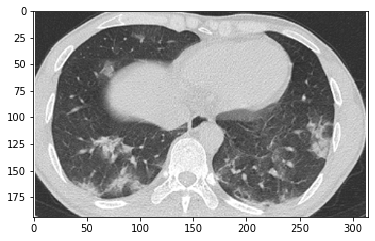

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

In [8]:
i = Input([None, None, 3], dtype=tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.keras.applications.inception_v3.preprocess_input(x)
core = tf.keras.applications.InceptionV3()
x = core(x)

model = tf.keras.Model(inputs=[i], outputs=[x])

#img = tf.image.decode_jpeg(tf.io.read_file(datapoint[0]))
#result = model(img)

# model = tf.keras.applications.InceptionV3(include_top=)


# compile model to train based on mse using the Adam Optimizer. Metrics displayed is accuracy.
model.compile(optimizer='adam', loss='mse', metrics='acc')

In [18]:
# get the image data and load it into memory

train_X = np.asarray([dh.load_image(fp) for (fp, label) in train_data]).astype('uint8')
train_y = np.asarray([label for (fp, label) in train_data]).astype('bool')

test_X = np.asarray([dh.load_image(fp) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('bool')

ValueError: setting an array element with a sequence.

In [ ]:
model = model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, epochs=100)

In [12]:
train_X[0].shape

(194, 315, 3)

In [28]:
imgs = [tf.keras.applications.inception_v3.preprocess_input(tf.cast(dh.load_image(fp), tf.float32)) for (fp, label) in train_data]

In [30]:
imgs[0].shape

TensorShape([194, 315, 3])

In [31]:
imgs[1].shape

TensorShape([249, 385, 3])